In [1]:
from history import History
import matplotlib.pyplot as plt

In [2]:
base_path = r'C:\Users\huda\Documents\GitHub\scheduling_model\code\upgrades\code\results\\'
files = ['5-2-2024-0-5_Kacem_2.json', '5-2-2024-1-5_Kacem_2.json', '5-2-2024-2-5_Kacem_2.json', '5-2-2024-3-5_Kacem_2.json', '5-2-2024-4-5_Kacem_2.json', '5-2-2024-5-5_Kacem_2.json', '5-2-2024-6-5_Kacem_2.json', '5-2-2024-7-5_Kacem_2.json', '5-2-2024-8-5_Kacem_2.json', '5-2-2024-9-5_Kacem_2.json']

In [3]:
data : list[History] = []
for entry in files:
    data.append(History.from_file(f'{base_path}{entry}'))

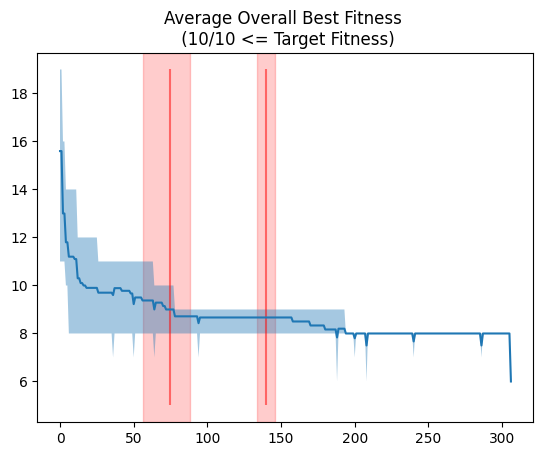

In [68]:
plot_data_x = []
plot_data_lb = []
plot_data_ub = []
max_length = 0
max_restarts = 0
reached_best = 0
for entry in data:
    if entry.overall_best[-1][0] <= entry.target_fitness:
        reached_best+=1
    if len(entry.overall_best) > max_length:
        max_length = len(entry.overall_best)
    if len(entry.restart_generations) > max_restarts:
        max_restarts = len(entry.restart_generations)
for i in range(max_length):
    average = 0.0
    participants = 0
    plot_data_lb.append(float('inf'))
    plot_data_ub.append(0)
    for j in range(len(data)):
        if len(data[j].overall_best) > i:
            average+=data[j].overall_best[i][0]
            participants+=1
            if data[j].overall_best[i][0] < plot_data_lb[i]:
                plot_data_lb[i] = data[j].overall_best[i][0]
            if data[j].overall_best[i][0] > plot_data_ub[i]:
                plot_data_ub[i] = data[j].overall_best[i][0]
    average = average/participants
    plot_data_x.append(average)
restart_lb = []
restart_x = []
restart_ub = []
for i in range(max_restarts):
    average = 0.0
    participants = 0
    restart_lb.append(float('inf'))
    restart_ub.append(0)
    for j in range(len(data)):
        if len(data[j].restart_generations) > i:
            average+=data[j].restart_generations[i]
            participants += 1
            if data[j].restart_generations[i] < restart_lb[i]:
                restart_lb[i] = data[j].restart_generations[i]
            if data[j].restart_generations[i] > restart_ub[i]:
                restart_ub[i] = data[j].restart_generations[i]
    average = average/participants
    restart_x.append(average)
for i in range(len(restart_x)):
    plt.axvspan(restart_lb[i], restart_ub[i], color='red', alpha=0.2)
plt.vlines(restart_x, 5, 19, color='red', alpha=0.5)
plt.plot(plot_data_x)
plt.title(f'Average Overall Best Fitness \n ({reached_best}/{len(data)} <= Target Fitness)')
plt.fill_between(range(len(plot_data_x)), plot_data_lb, plot_data_ub, alpha=.4)

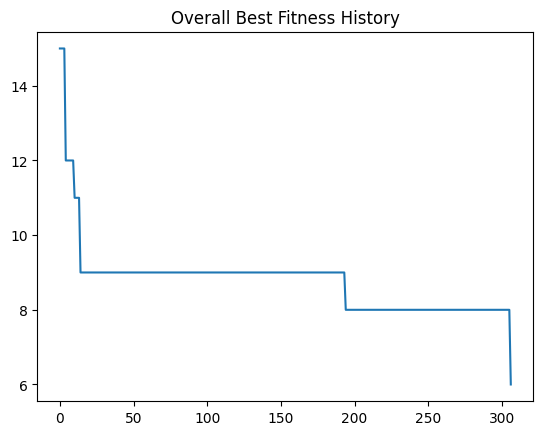

In [30]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

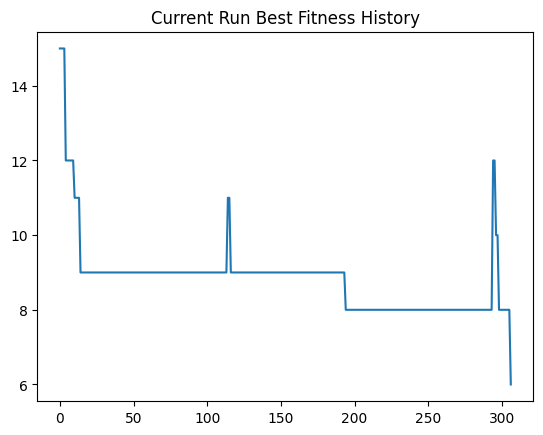

In [31]:
plt.title('Current Run Best Fitness History')
plt.plot(data[2].run_best_fitness())

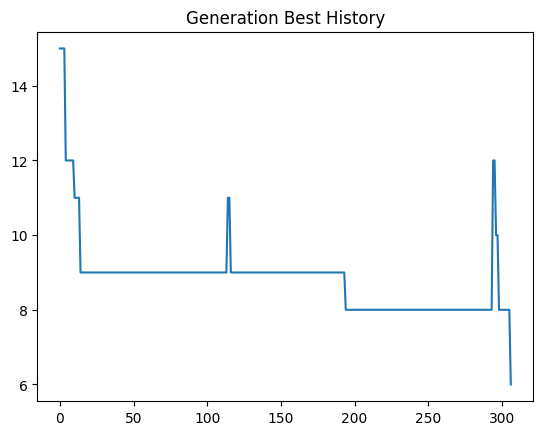

In [32]:
plt.title('Generation Best History')
plt.plot(data[2].generation_best_fitness())

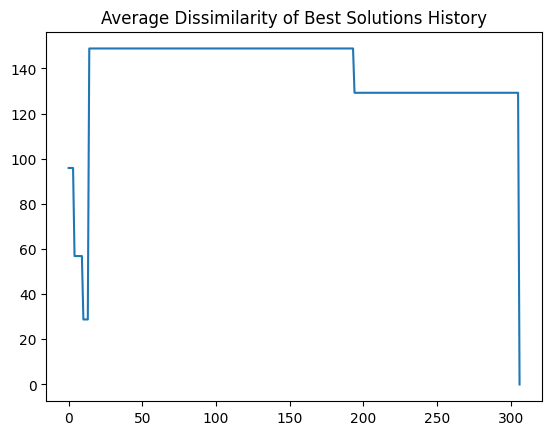

In [33]:
overall_dissimilarity = data[2].average_dissimilarity_history('overall')
plt.title('Average Dissimilarity of Best Solutions History')
plt.plot(overall_dissimilarity)

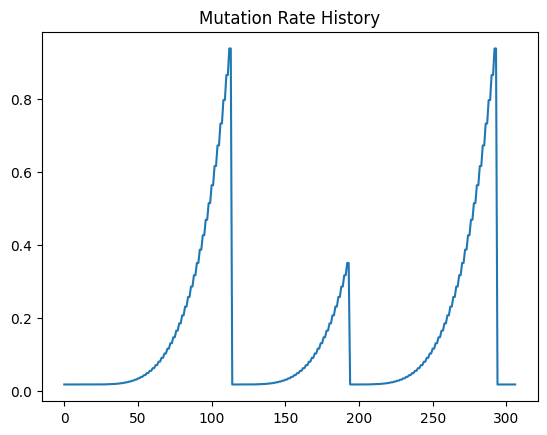

In [34]:
plt.title('Mutation Rate History')
plt.plot(data[2].mutation_probability)

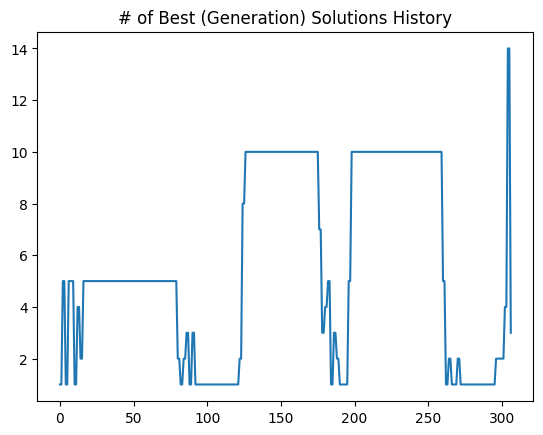

In [35]:
plt.title('# of Best (Generation) Solutions History')
plt.plot(data[2].get_amount_best_generation_history())

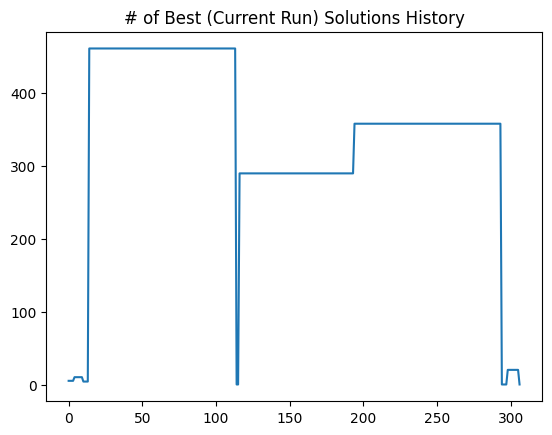

In [36]:
plt.title('# of Best (Current Run) Solutions History')
plt.plot(data[2].get_amount_best_run_history())


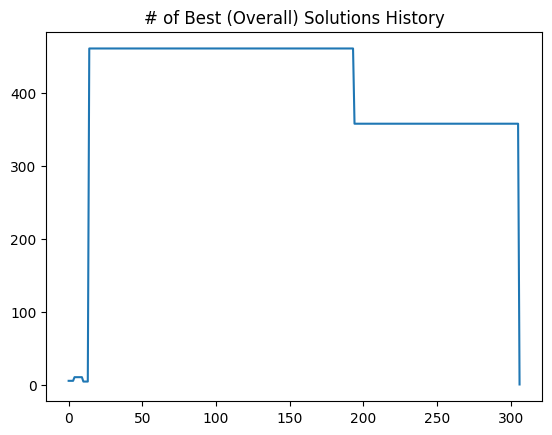

In [37]:
plt.title('# of Best (Overall) Solutions History')
plt.plot(data[2].get_amount_best_overall_history())

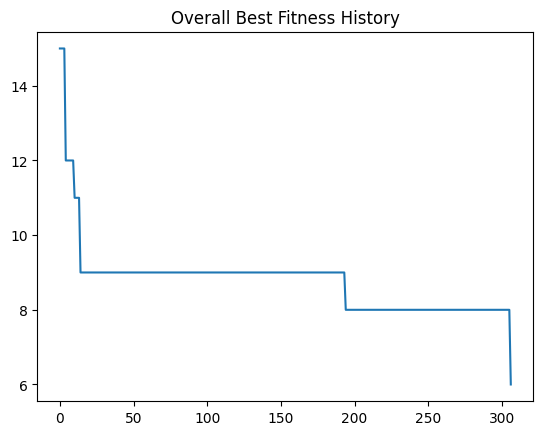

In [38]:
plt.title('Overall Best Fitness History')
plt.plot(data[2].overall_best_fitness())

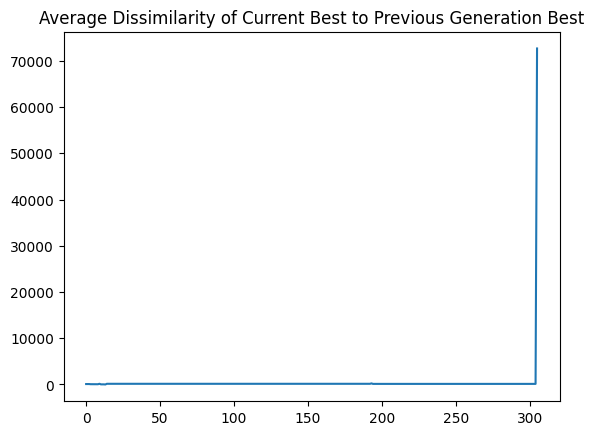

In [39]:
plt.title('Average Dissimilarity of Current Best to Previous Generation Best')
plt.plot(data[2].average_dissimilarity_prev_generation())

In [40]:
print(data[2].summary())

Instance: 5_Kacem_2
------------------
Result
Best Fitness: 6
Generations: 153/None	Function Evaluations: 6785/None	Runtime: 1.6507556438446045/3600	Target Fitness: 7	Restarts: 2
------------------
Starting Parameters
Population Size: 5	Offspring Amount: 20	Population Growth (on restart): 2
Restart Time: 50	Max. Mutation Rate: 1.0	Elitism: 0.1	Tournament Size: 0.2


In [17]:
import pandas as pd
data_for_df = [x.__dict__ for x in data]
df = pd.DataFrame(data_for_df)

In [18]:
df

,instance,overall_best,run_best,generation_best,mutation_probability,restart_generations,time_checkpoints,function_evaluations,generations,runtime,...,max_generations,target_fitness,function_evaluation_limit,generations_reached,time_exceeded,function_evaluations_exceeded,target_fitness_reached,required_operations,available_machines,durations
0,5_Kacem_2,"[[18, [[[5, 8, 3, 1, 7, 3, 0, 7, 6, 2, 0, 2, 5...","[[18, [[[5, 8, 3, 1, 7, 3, 0, 7, 6, 2, 0, 2, 5...","[[18, [[[5, 8, 3, 1, 7, 3, 0, 7, 6, 2, 0, 2, 5...","[0.017241379310344827, 0.017241379310344827, 0...",[],[],945,47,0.161416,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
1,5_Kacem_2,"[[18, [[[2, 3, 5, 9, 7, 6, 1, 0, 0, 4, 6, 7, 3...","[[18, [[[2, 3, 5, 9, 7, 6, 1, 0, 0, 4, 6, 7, 3...","[[18, [[[2, 3, 5, 9, 7, 6, 1, 0, 0, 4, 6, 7, 3...","[0.017241379310344827, 0.017241379310344827, 0...",[],[],645,32,0.096622,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
2,5_Kacem_2,"[[15, [[[2, 6, 7, 2, 6, 2, 8, 4, 9, 0, 7, 3, 8...","[[15, [[[2, 6, 7, 2, 6, 2, 8, 4, 9, 0, 7, 3, 8...","[[15, [[[2, 6, 7, 2, 6, 2, 8, 4, 9, 0, 7, 3, 8...","[0.017241379310344827, 0.017241379310344827, 0...","[56, 146]",[],6785,153,1.650756,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
3,5_Kacem_2,"[[16, [[[3, 7, 9, 0, 1, 4, 0, 9, 3, 4, 5, 8, 6...","[[16, [[[3, 7, 9, 0, 1, 4, 0, 9, 3, 4, 5, 8, 6...","[[16, [[[3, 7, 9, 0, 1, 4, 0, 9, 3, 4, 5, 8, 6...","[0.017241379310344827, 0.017241379310344827, 0...",[85],[],3850,120,0.631938,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
4,5_Kacem_2,"[[17, [[[8, 9, 1, 4, 0, 7, 8, 2, 4, 6, 6, 9, 2...","[[17, [[[8, 9, 1, 4, 0, 7, 8, 2, 4, 6, 6, 9, 2...","[[17, [[[8, 9, 1, 4, 0, 7, 8, 2, 4, 6, 6, 9, 2...","[0.017241379310344827, 0.017241379310344827, 0...",[],[],365,18,0.049070,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
5,5_Kacem_2,"[[13, [[[8, 9, 5, 0, 6, 2, 5, 9, 8, 1, 2, 4, 3...","[[13, [[[8, 9, 5, 0, 6, 2, 5, 9, 8, 1, 2, 4, 3...","[[13, [[[8, 9, 5, 0, 6, 2, 5, 9, 8, 1, 2, 4, 3...","[0.017241379310344827, 0.017241379310344827, 0...",[88],[],2990,100,0.457080,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
6,5_Kacem_2,"[[19, [[[8, 3, 0, 3, 6, 5, 9, 1, 7, 4, 2, 1, 0...","[[19, [[[8, 3, 0, 3, 6, 5, 9, 1, 7, 4, 2, 1, 0...","[[19, [[[8, 3, 0, 3, 6, 5, 9, 1, 7, 4, 2, 1, 0...","[0.017241379310344827, 0.017241379310344827, 0...",[62],[],3670,104,0.783728,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
7,5_Kacem_2,"[[12, [[[9, 7, 6, 5, 6, 9, 2, 4, 7, 7, 1, 4, 2...","[[12, [[[9, 7, 6, 5, 6, 9, 2, 4, 7, 7, 1, 4, 2...","[[12, [[[9, 7, 6, 5, 6, 9, 2, 4, 7, 7, 1, 4, 2...","[0.017241379310344827, 0.017241379310344827, 0...",[77],[],2970,94,0.472926,...,None,7,None,None,False,None,True,"[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, ...","[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6],...","[[1, 4, 6, 9, 3, 5, 2], [8, 9, 5, 4, 1, 1, 3],..."
8,5_Kacem_2,"[[17, [[[8, 5, 4, 7, 4, 0, 2, 3, 0, 2, 6, 1, 9...","[[17, [[[8, 5, 4, 7, 4, 0, 2, 3, 0, 2, 6, 1, 9...","[[17, [[[8, 5, 4, 7, 4, 0, 2, 3, 